# Wavelet example
## Some simple code to  understand/choose wavelet parameters:
### Author: Valentina Ticcinelli, <valentina.ticcinelli@ucb.com>
### Creation date: 28-07-2010    

In [50]:
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from IPython.core.display import Image, display
import plotly as py
import pywt
import os

For the purpose of checking if our wavelet parameters are set up correctly, here we build a simple sinusoidal with known spectral content:


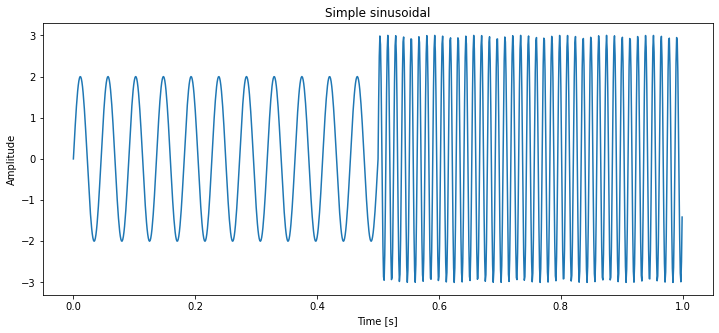

In [62]:
# define sample frequency and spectral content
Ts= 0.001 # sampling time
F1=22      # main freqs of the sinusoidal
F2=78
amp1=2   #amplitudes
amp2=3


L=1       # signal length (in seconds)

# create and show sinusoidal:
time1        = np.arange(0, L/2, Ts)
time        = np.arange(0, L, Ts)

signal1   = np.sin(2*np.pi*F1*time1) * amp1
signal2   = np.sin(2*np.pi*F2*time1) * amp2
signal=np.append(signal1,signal2)

plt.figure(figsize=(12,5))
plt.title("Simple sinusoidal")
plt.plot(time,signal)
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.show()


The function pywt.cwt is part of the package [PyWavelets](https://pywavelets.readthedocs.io/en/latest/index.html)
(`pip install PyWavelets` or `conda install pywavelets`)

For the use of the complex morlet wavelet:
  * `cmorlA-B`:
    * A=span of the wavelet: higher values of A improve frequency resolution at the cost of time resolution (longer wavelet).
    * B=central frequency: stronger, similar effect than A (number of oscillations included into a single wavelet).
  * scales:  inversely proportional to the frequencies, with relation:  `freqs=Fs*B/scale`
  * sampling time: `Ts=1/Fs`

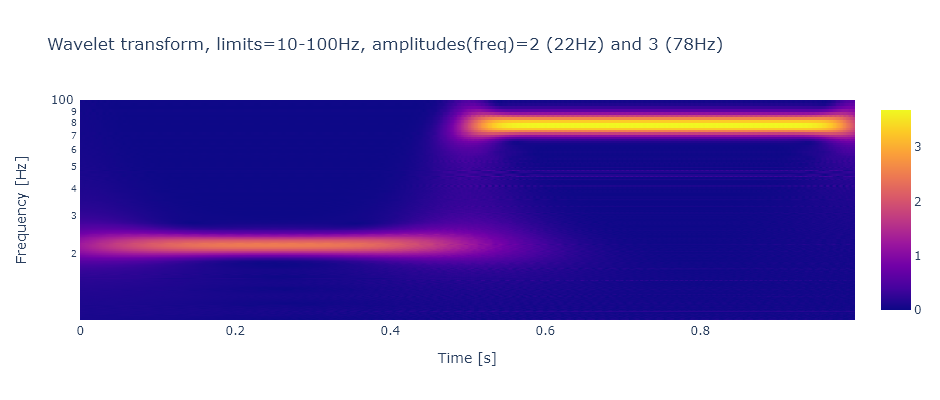

In [67]:
# parameters of the wavelet
A=1  # wavelet span, does not effect the freq/scale conversion
B=3  # central frequency - effects the freq/scale conversion

# limits of scales/freq of the wavelet:
F_low=10 #Hz
F_high=100 #Hz
S_high= B/Ts/F_low #scale conversion
S_low= B/Ts/F_high #scale conversion



# compute and show wavelet
scales = np.arange(S_low,S_high)
cwtmatr, freqs = pywt.cwt(signal, scales, 'cmor'+str(A)+'-'+str(B),Ts) 
PW=np.multiply(np.sqrt(1/(scales)*2*np.pi),abs(cwtmatr).T)
fig = px.imshow(PW.T,
                x=time, 
                y=freqs, 
                aspect='auto', 
                origin='lower',    
                height=400,    
                width=940, 
                title='Wavelet transform, limits='+str(F_low)+"-"+str(F_high)+"Hz, amplitudes(freq)=" + str(amp1) + " (" + str(F1) + "Hz) and " + str(amp2)+ " ("  + str(F2) + "Hz)")
fig.update_yaxes(type="log")
fig.update_layout(xaxis_title="Time [s]",
                 yaxis_title="Frequency [Hz]")

imFile='wavelet-cmor'+str(A)+'-'+str(B)+'.png'
fig.write_image('img/'+ imFile)
display(Image('img/' +imFile, width=900, unconfined=True))
#fig.show() # to show the interactive plot (for some installations it does not work)

# to save into an interactive html:
#py.offline.plot(fig, filename='wavelet-cmor'+str(A)+'-'+str(B)+'.html',include_plotlyjs='cdn', auto_open=False)

In [32]:
#os.system('jupyter nbconvert --to html Demo_Wavelet.ipynb')